

---



Ans. 1)

Multiplying a (n X k) matrix, lets name matrix P with a (k X m) matrix, lets name Q, will give us a (n X m) matrix, lets name R.

So R has (m*n) entries, and each entry is calculated by multiplying corresponding entries from a row of matrix P to a column of matrix Q, i.e, multiplying k entries from P to k entries from Q and adding them all gives us the corresponding entry in R.

Thus, for each entry in R we multiply k pairs and add k elements (Note: here we add k elements but perform the addition operation k-1 times). Thus, for entire matrix R, #**we perform mn*(k) multiplication and mn*(k-1) addition operations.**



---



Ans. 2)

In [10]:
# Common for both the ways:(Using list of lists or using numpy)

n = int(input("Enter the value of n: "))
k = int(input("Enter the value of k: "))
m = int(input("Enter the value of m: "))
print ("enter the rows of first matrix, each element of the row being space separated and each row beginning from a new line of input")
P = []
for i in range (n):
  nj = list(map(int,input().split()))
  P.append(nj)
Q = []
print ("enter the rows of second matrix, each element of the row being space separated and each row beginning from a new line of input")
for i in range (k):
  kj = list(map(int,input().split()))
  Q.append(kj)

Enter the value of n: 3
Enter the value of k: 4
Enter the value of m: 2
enter the rows of first matrix, each element of the row being space separated and each row beginning from a new line of input
7 8 4 2
6 3 2 3
5 2 5 7
enter the rows of second matrix, each element of the row being space separated and each row beginning from a new line of input
6 9
4 3
6 6
4 8


In [27]:
# Using list of lists

import time
start_time = time.time()

R = []
for a in range (n):
  row = []
  for b in range (m):
    sum = 0
    for c in range (k):
      sum += (P[a][c])*(Q[c][b])
    row.append(sum)
  R.append(row)
print (R)
print("--- %s seconds ---" % (time.time() - start_time))

[[106, 127], [72, 99], [96, 137]]
--- 0.0023026466369628906 seconds ---


In [14]:
# Using numpy

import numpy as np
P = np.array(P)
Q = np.array(Q)

import time
start_time = time.time()

R = np.dot(P,Q)
print (R)
print("--- %s seconds ---" % (time.time() - start_time))

[[106 127]
 [ 72  99]
 [ 96 137]]
--- 0.0008654594421386719 seconds ---


The code written using numpy works faster, because here, broadcasting comes into the picture which is later explained. Numpy vectorises the array, and then computes the dot product in C instead of numpy, thus improving the runtime.



---



Ans 3)

Let's say the length of the list = n.

If n is even then median is the average of n/2th highest term and ((n/2) + 1)th highest term which will require n/2 + 1 passes of the array. Elif n is odd, median is the ((n+1)/2)th highest term and hence require ((n+1)/2) passes of the array. This happens if we go by the first method and hence time complexity is $$O(n^2)$$.



An alternate method can be creating quicksorting the given array and then directly computing the median, hence which works on a time complexity of O(nlogn)

In [ ]:
#  Going by the method mentioned in the problem statement
n = int(input("Enter the length of the array: "))
arr = list(map(int,input().split()))

import time
start_time = time.time()

if n%2:
  r = (n+1)//2
  for i in range (r):
    med = -1000000
    for j in range (n):
      if arr[j] > med:
        med = arr[j]
    if i<r-1:
      arr[arr.index(med)] = -1000000
  print ("The median of the given list is:",med)

else:
  r = n//2 + 1
  for i in range (r):
    med = -1000000
    for j in range (n):
      if arr[j] > med:
        med = arr[j]
    if i<r-2:
      arr[arr.index(med)] = -1000000
    elif i==r-2:
      m1 = med
      arr[arr.index(med)] = -1000000
    else:
      m2 = med
  med = (m1+m2)/2
  print ("The median of the given list is:",med)

print("--- %s seconds ---" % (time.time() - start_time))

Enter the length of the array: 62
3 4 8 2 3 57 0 21 35 3446 884 1346 458 303 5456 213 423 56442 4535 345 2344 5234 5133 351 513 51 531 534 1 5135 542 52 45344 523 5 5 235 35 3245 35 2234 55 33 5 4535 53 523 3255 345 345 255 35555 533 534 553 45345 3453 53 453 5345 3 53
The median of the given list is: 387.0
--- 0.002388477325439453 seconds ---


In [ ]:
#  Using the quicksort method
n = int(input("Enter the length of the array: "))
arr = list(map(int,input().split()))

import time
start_time = time.time()

def partition(arr1,start,end):
    pivot = arr1[start]
    i = start+1
    j = end
    while i<=j:
        while i<=end and arr1[i] < pivot:
            i += 1
        while j>=start and arr1[j] > pivot:
            j -= 1
        if i<=j:
            arr1[i], arr1[j] = arr1[j], arr1[i]
            i += 1
            j -= 1
    if i<=end:
        arr1[i-1] , arr1[start] = arr1[start] , arr1[i-1]
        return i-1
    else:
        arr1[end] , arr1[start] = arr1[start] , arr1[end]
        return end


def quick_sort(arr,start,end):
    if end <= start:
        return
    index = partition(arr,start,end)
    quick_sort(arr,start,index-1)
    quick_sort(arr,index+1,end)


quick_sort(arr,0,n-1)
if n%2:
  med = arr[(n-1)//2]
else:
  med = (arr[(n//2) - 1] + arr[(n//2)])/2
print ("The median is:",med)
print("--- %s seconds ---" % (time.time() - start_time))

Enter the length of the array: 62
3 4 8 2 3 57 0 21 35 3446 884 1346 458 303 5456 213 423 56442 4535 345 2344 5234 5133 351 513 51 531 534 1 5135 542 52 45344 523 5 5 235 35 3245 35 2234 55 33 5 4535 53 523 3255 345 345 255 35555 533 534 553 45345 3453 53 453 5345 3 53
The median is: 387.0
--- 0.001840829849243164 seconds ---


In [ ]:
# Using numpy.median
n = int(input("Enter the length of the array: "))
arr = list(map(int,input().split()))

import time
start_time = time.time()

import numpy as np
print ("The median is:",np.median(arr))
print("--- %s seconds ---" % (time.time() - start_time))

Enter the length of the array: 62
3 4 8 2 3 57 0 21 35 3446 884 1346 458 303 5456 213 423 56442 4535 345 2344 5234 5133 351 513 51 531 534 1 5135 542 52 45344 523 5 5 235 35 3245 35 2234 55 33 5 4535 53 523 3255 345 345 255 35555 533 534 553 45345 3453 53 453 5345 3 53
The median is: 387.0
--- 0.0005586147308349609 seconds ---


I used the time library to calculate the runtime of all 3.So, we find the traditional method takes the most and a lot more time compared to the other two methods. Followed by quicksort method takes somewhat less time then the traditional method. And at last, the numpy.median is the most efficient way and it has the least runtime. Here, using mergesort won't work as mergesort includes creation of new lists, which itself take a significant amount of though constant time.



---



Ans 4)

Gradient with respect to x: $$2xy + y^3cos(x)$$

Gradient with respect to y: $$x^2 + 3y^2sin(x)$$



---



Ans 5)

In [8]:
# AN UNSUCCESSFUL ATTEMPT

import jax.numpy as jnp
from jax import grad
import math

def f(x,y):
  return (x**2)*y + (y**3)*(math.sin(x))

# pi = math.pi
x1 = 0.0
y1 = 3.0
# df_dx = jnp.gradient(f(x1,y1), argnums = 0)
# df_dxy = grad(f,argnums = (0,1))
# df_dx = grad(f, argnums = 0)
# df_dy = grad(f, argnums = 1)

# assert df_dxy(x1, y1) == (df_dx(x1, y1), df_dy(x1, y1))
# print(df_dx)
# print (df_dx(x1,y1),df_dy(x1,y1))



---



Ans 6)

In [6]:
import sympy as sp

x,y = sp.symbols('x y')
def gradient(f):
    return [f.diff(x), f.diff(y)]
f = (x**2)*y + (y**3)*(sp.sin(x))
df_dx = gradient(f)[0]
df_dy = gradient(f)[1]
print ("Partial Derivative of given funcn f with respect to x is:",df_dx)
print ("Partial Derivative of given funcn f with respect to y is:",df_dy)

Partial Derivative of given funcn f with respect to x is: 2*x*y + y**3*cos(x)
Partial Derivative of given funcn f with respect to y is: x**2 + 3*y**2*sin(x)


Here, I get the exactly same partial derivatives of the funcn both calculated manually, and that through using sympy.



---



Ans 7)

In [ ]:
# For the sake of simplicity, I have considered only 2 branches, and 3 students in each branch. Also I have kept the marks of everyone the same but can be altered by manually or taking the user input.

marks_yr_b_rn = {'Maths':100 ,'English': 70, 'Physics': 85, 'Chemistry': 92}

database = {}

year_2022 = {'2022': {'Branch1':{'Roll_no_1':{'Name': 'Rahul','Marks':marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Bhairav','Marks':marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Kavya','Marks':marks_yr_b_rn}} , 'Branch2':{'Roll_no_1':{'Name': 'Tanuj' , 'Marks': marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Prince' , 'Marks': marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Suhani' , 'Marks': marks_yr_b_rn}}}}
year_2023 = {'2023': {'Branch1':{'Roll_no_1':{'Name': 'Mahesh','Marks':marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Priya','Marks':marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Ajay','Marks':marks_yr_b_rn}} , 'Branch2':{'Roll_no_1':{'Name': 'Jagdish' , 'Marks': marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Sourabh' , 'Marks': marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Himanshu' , 'Marks': marks_yr_b_rn}}}}
year_2024 = {'2024': {'Branch1':{'Roll_no_1':{'Name': 'Shantanu','Marks':marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Nisha','Marks':marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Aamir','Marks':marks_yr_b_rn}} , 'Branch2':{'Roll_no_1':{'Name': 'Kamal' , 'Marks': marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Vikas' , 'Marks': marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Katrina' , 'Marks': marks_yr_b_rn}}}}
year_2025 = {'2025': {'Branch1':{'Roll_no_1':{'Name': 'David','Marks':marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Rajnikant','Marks':marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Jasmine','Marks':marks_yr_b_rn}} , 'Branch2':{'Roll_no_1':{'Name': 'Pankaj' , 'Marks': marks_yr_b_rn} , 'Roll_no_2':{'Name': 'Garima' , 'Marks': marks_yr_b_rn} , 'Roll_no_3':{'Name': 'Vicky' , 'Marks': marks_yr_b_rn}}}}

database = database | year_2022 | year_2023 | year_2024 | year_2025
# print (database)



---



# Ans 8) NOT DONE



---



Ans 9)

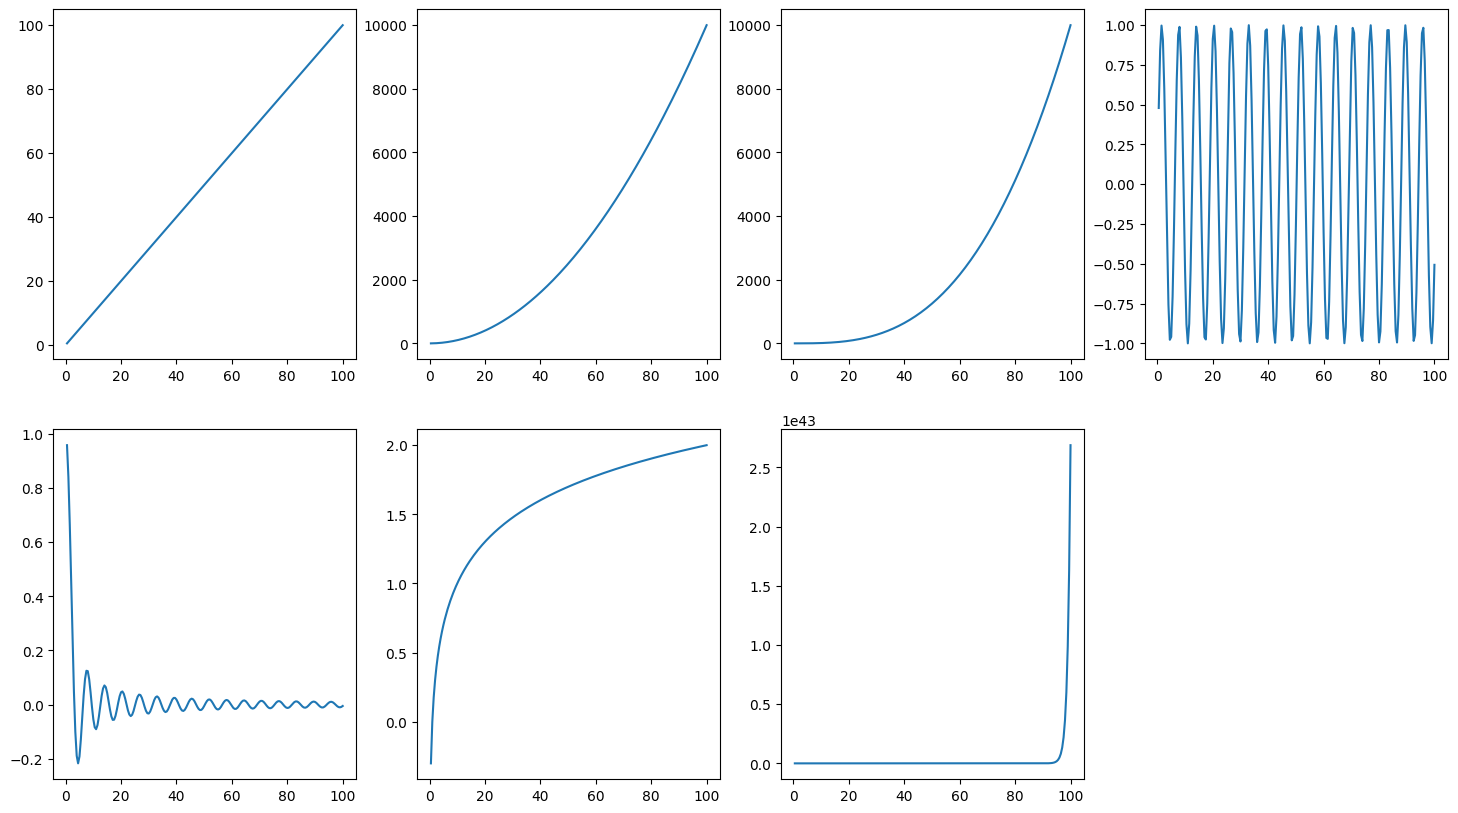

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

# new_list = [i**2 for i in listA]

x = np.arange(0.5,100.1,0.5)
y1 = x
y2 = [i**2 for i in x]
y3 = [(i**3)/100 for i in x]
y4 = [np.sin(i) for i in x]
y5 = [(np.sin(i))/i for i in x]
y6 = [(np.log10(i)) for i in x]
y7 = [(np.exp(i)) for i in x]
# print (y7)

plt.figure(figsize = (18,10))
plt.subplot(2, 4, 1)
plt.plot(x,y1)
plt.subplot(2, 4, 2)
plt.plot(x,y2)
plt.subplot(2,4,3)
plt.plot(x,y3)
plt.subplot(2,4,4)
plt.plot(x,y4)
plt.subplot(2,4,5)
plt.plot(x,y5)
plt.subplot(2,4,6)
plt.plot(x,y6)
plt.subplot(2,4,7)
plt.plot(x,y7)

plt.show()




---



Ans 10)

In [ ]:
import numpy as np

matrix = np.random.uniform(1, 2, (20, 5))
print (matrix)


[[1.81560957 1.96404538 1.16344254 1.21206244 1.7821366 ]
 [1.27981359 1.40981598 1.0318691  1.80664888 1.13310952]
 [1.56145746 1.56998013 1.6515143  1.97445661 1.97870089]
 [1.95921844 1.42625596 1.62303499 1.82452675 1.73434695]
 [1.38363505 1.00064533 1.90171852 1.33156339 1.71649451]
 [1.32459614 1.76139872 1.5011799  1.47234642 1.02064053]
 [1.27679606 1.24684298 1.29089807 1.94591425 1.38332165]
 [1.34300393 1.17126384 1.23093399 1.97379294 1.36422324]
 [1.82329488 1.9163113  1.61218195 1.24440564 1.44317234]
 [1.78188576 1.67593366 1.62999401 1.2885082  1.16058149]
 [1.70262913 1.13609374 1.04697602 1.25026794 1.74466672]
 [1.65127981 1.79637725 1.12615549 1.12268154 1.91093314]
 [1.40761468 1.4810605  1.38059928 1.72750492 1.92115374]
 [1.41076495 1.03780177 1.41082546 1.26715653 1.92425251]
 [1.32650995 1.39068662 1.41849812 1.36198672 1.49392353]
 [1.54448559 1.52600528 1.52154507 1.66017659 1.66334322]
 [1.14428822 1.92701264 1.25715136 1.83109136 1.17605226]
 [1.21426574 1

In [ ]:
import pandas as pd
data_f = pd.DataFrame(matrix)
data_f.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e'}, inplace=True)

a_stddev = data_f['a'].std()
b_stddev = data_f['b'].std()
c_stddev = data_f['c'].std()
d_stddev = data_f['d'].std()
e_stddev = data_f['e'].std()

print (data_f)

data_f['Mean'] = data_f.mean(axis=1)

x = [a_stddev,'a',b_stddev,'b',c_stddev,'c',d_stddev,'d',e_stddev,'e']
max_std_dev_index = x.index(max(x[0::2]))
print ('The column with the highest standard deviation is:','Column',x[max_std_dev_index+1],',with a standard deviation of',x[max_std_dev_index])

row_num = data_f.index[data_f['Mean']==(data_f['Mean'].min())]

print ('The row with lowest mean is:')
display(data_f.iloc[row_num])

data_f = data_f.drop('Mean', axis=1)

           a         b         c         d         e
0   1.815610  1.964045  1.163443  1.212062  1.782137
1   1.279814  1.409816  1.031869  1.806649  1.133110
2   1.561457  1.569980  1.651514  1.974457  1.978701
3   1.959218  1.426256  1.623035  1.824527  1.734347
4   1.383635  1.000645  1.901719  1.331563  1.716495
5   1.324596  1.761399  1.501180  1.472346  1.020641
6   1.276796  1.246843  1.290898  1.945914  1.383322
7   1.343004  1.171264  1.230934  1.973793  1.364223
8   1.823295  1.916311  1.612182  1.244406  1.443172
9   1.781886  1.675934  1.629994  1.288508  1.160581
10  1.702629  1.136094  1.046976  1.250268  1.744667
11  1.651280  1.796377  1.126155  1.122682  1.910933
12  1.407615  1.481061  1.380599  1.727505  1.921154
13  1.410765  1.037802  1.410825  1.267157  1.924253
14  1.326510  1.390687  1.418498  1.361987  1.493924
15  1.544486  1.526005  1.521545  1.660177  1.663343
16  1.144288  1.927013  1.257151  1.831091  1.176052
17  1.214266  1.886109  1.560693  1.541153  1.

,a,b,c,d,e,Mean
1,1.279814,1.409816,1.031869,1.806649,1.13311,1.332251




---



Ans 11)

In [ ]:
data_f['f'] = data_f['a']+data_f['b']+data_f['c']+data_f['d']+data_f['e']
data_f['g'] = ['LT8' if x<8 else 'GT8' for x in data_f['f']]
print(data_f)
print()

cnt = len(data_f[data_f['g']=='LT8'])
print('The number of rows with Sum value being less than 8 are:',cnt)
L_stddev = data_f['f'][data_f['g']=='LT8'].std()
print('The standard deviation for the LT8 values is:',L_stddev)
G_stddev = data_f['f'][data_f['g']=='GT8'].std()
print('The standard deviation for the GT8 values is:',G_stddev)

           a         b         c         d         e         f    g
0   1.815610  1.964045  1.163443  1.212062  1.782137  7.937297  LT8
1   1.279814  1.409816  1.031869  1.806649  1.133110  6.661257  LT8
2   1.561457  1.569980  1.651514  1.974457  1.978701  8.736109  GT8
3   1.959218  1.426256  1.623035  1.824527  1.734347  8.567383  GT8
4   1.383635  1.000645  1.901719  1.331563  1.716495  7.334057  LT8
5   1.324596  1.761399  1.501180  1.472346  1.020641  7.080162  LT8
6   1.276796  1.246843  1.290898  1.945914  1.383322  7.143773  LT8
7   1.343004  1.171264  1.230934  1.973793  1.364223  7.083218  LT8
8   1.823295  1.916311  1.612182  1.244406  1.443172  8.039366  GT8
9   1.781886  1.675934  1.629994  1.288508  1.160581  7.536903  LT8
10  1.702629  1.136094  1.046976  1.250268  1.744667  6.880634  LT8
11  1.651280  1.796377  1.126155  1.122682  1.910933  7.607427  LT8
12  1.407615  1.481061  1.380599  1.727505  1.921154  7.917933  LT8
13  1.410765  1.037802  1.410825  1.267157  1.92



---



Ans 12) Broadcasting is a term used in the context of numpy array. It facilitates us with operations on arrays by looping in C language instead of Python. It does this by vectorising array operations. It helps us improving the runtime.

In [ ]:
import numpy as np

arr1 = np.array([[1,2,3],[2,3,4],[3,4,5]])
arr2 = [3,2,1]
arr0 = arr1 + arr2 #Adding [3,2,1] in arr2, to corresponding values of each row of arr1.
print(arr0)

[[4 4 4]
 [5 5 5]
 [6 6 6]]




---



Ans 13)

In [ ]:
import numpy as np

n = int(input("Enter the no. of rows: "))
m = int(input("Enter the no. of columns: "))
arr = np.array([input().strip().split() for _ in range(n)], float)
# print (arr)

mini = 1000000
for i in range (n):
  for j in range (m):
    if arr[i][j] < mini:
      mini = arr[i][j]
      ind = (i,j)

# Here, the question asks the index of the min value, so ans is given considering indexing from 0
# If u want indexing from 1, then set ind = (i+1,j+1)

print (ind)

Enter the no. of rows: 3
Enter the no. of columns: 4
2.3 3.4 6.0 9.2
7.8 8.2 3.3 6
1.3 4.6 0.8 77
(2, 2)


In [ ]:
# Verifying using argmin

x0 = (np.argmin(arr))
i1 = int(x0//m)
j1 = x0%m
print((i1,j1))

(2, 2)
